In [31]:
from openTSNE import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import pickle, gzip

In [69]:
dit = {k:v for k,v in MACOSKO_COLORS.items() if k in classes}

In [71]:
def plot_helper(x,y,**kwargs):
    MACOSKO_COLORS = {
        "Amacrine cells": "#A5C93D",
        "Astrocytes": "#8B006B",
        "Bipolar cells": "#2000D7",
        "Cones": "#538CBA",
        "Fibroblasts": "#8B006B",
        "Horizontal cells": "#B33B19",
        "Microglia": "#8B006B",
        "Muller glia": "#8B006B",
        "Pericytes": "#8B006B",
        "Retinal ganglion cells": "#C38A1F",
        "Rods": "#538CBA",
        "Vascular endothelium": "#8B006B",
    }
    _, ax = matplotlib.pyplot.subplots(figsize=(8, 8))

    plot_params = {"alpha": kwargs.get("alpha", 0.6), "s": kwargs.get("s", 1)}
    classes = np.unique(y)

    

    if 'use_macosko' in kwargs and kwargs['use_macosko']:
        colors = {k: v for k, v in MACOSKO_COLORS.items() if k in classes}
    else:
        default_colors = matplotlib.rcParams["axes.prop_cycle"]
        colors = {k: v["color"] for k, v in zip(classes, default_colors())}
    
    point_colors = list(map(colors.get, y))
    ax.scatter(x[:,0],x[:,1],c=point_colors, rasterized=True, **plot_params)
    legend_handles = [
            matplotlib.lines.Line2D(
                [],
                [],
                marker="s",
                color="w",
                markerfacecolor=colors[yi],
                ms=10,
                alpha=1,
                linewidth=0,
                label=yi,
                markeredgecolor="k",
            )
            for yi in classes
        ]
    legend_kwargs_ = dict(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, )
    
    ax.legend(handles=legend_handles, **legend_kwargs_)

In [4]:
with gzip.open("../datasets/example_data_tsne.pkl.gz", "rb") as f:
    data = pickle.load(f)

In [13]:
x = data['pca_50'] #[44808, 50]
y = data['CellType1'] #[44808, ]
print("Data contains %d samples with %d features"%x.shape)

Data contains 44808 samples with 50 features


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)
print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

30021 training samples
14787 test samples


In [19]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

In [74]:
%time embedding_train = tsne.fit(x_train)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 11.04 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.61 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=12.00, lr=2501.75 for 250 iterations...
Iteration   50, KL divergence 5.1644, 50 iterations in 2.0461 sec
Iteration  100, KL divergence 5.0962, 50 iterations in 1.9548 sec
Iteration  150, KL divergence 5.0624, 50 iterations in 1.9877 sec
Iteration  200, KL divergence 5.0494, 50 iterations in 1.9720 sec
Iteration  250, KL divergence 5.0421, 50 iterations in 2.0020 sec
   --> Time elapsed: 9.96 seconds
===> Running optimization with exaggeration=

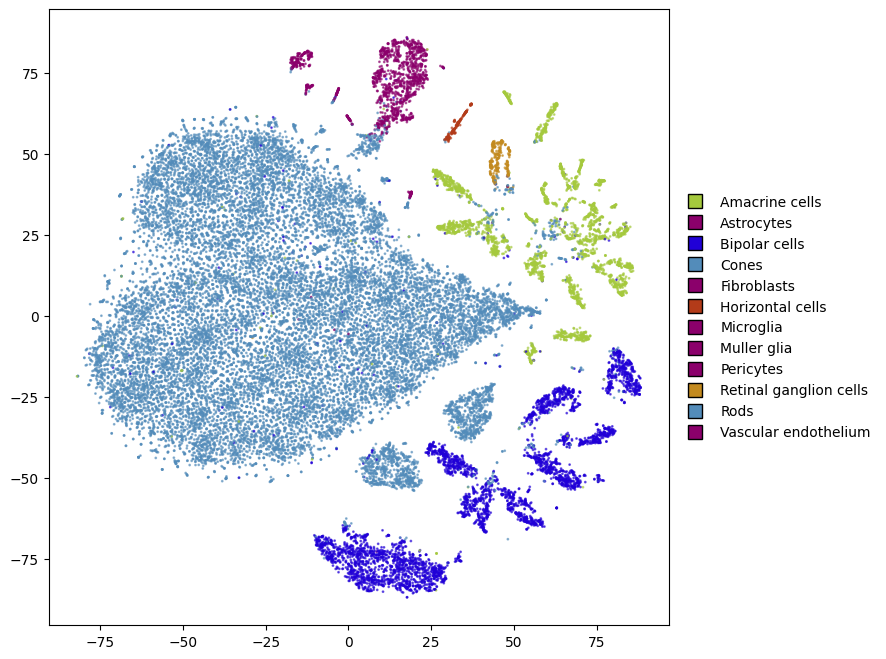

In [72]:
plot_helper(embedding_train,y_train)